In [1]:
import importlib, inspect

In [2]:
module = importlib.import_module('numpy')

In [3]:
# dir(inspect)

In [4]:
print(inspect.getsource(inspect.getsourcelines))

def getsourcelines(object):
    """Return a list of source lines and starting line number for an object.

    The argument may be a module, class, method, function, traceback, frame,
    or code object.  The source code is returned as a list of the lines
    corresponding to the object and the line number indicates where in the
    original source file the first line of code was found.  An OSError is
    raised if the source code cannot be retrieved."""
    object = unwrap(object)
    lines, lnum = findsource(object)

    if istraceback(object):
        object = object.tb_frame

    # for module or frame that corresponds to module, return all source lines
    if (ismodule(object) or
        (isframe(object) and object.f_code.co_name == "<module>")):
        return lines, 0
    else:
        return getblock(lines[lnum:]), lnum + 1



In [5]:
source_lines = inspect.getsourcelines(getattr(module, 'save'))
print(len(source_lines))

2


In [6]:
source_lines[0]

['@array_function_dispatch(_save_dispatcher)\n',
 'def save(file, arr, allow_pickle=True, fix_imports=True):\n',
 '    """\n',
 '    Save an array to a binary file in NumPy ``.npy`` format.\n',
 '\n',
 '    Parameters\n',
 '    ----------\n',
 '    file : file, str, or pathlib.Path\n',
 '        File or filename to which the data is saved.  If file is a file-object,\n',
 '        then the filename is unchanged.  If file is a string or Path, a ``.npy``\n',
 '        extension will be appended to the file name if it does not already\n',
 '        have one.\n',
 '    arr : array_like\n',
 '        Array data to be saved.\n',
 '    allow_pickle : bool, optional\n',
 '        Allow saving object arrays using Python pickles. Reasons for disallowing\n',
 '        pickles include security (loading pickled data can execute arbitrary\n',
 '        code) and portability (pickled objects may not be loadable on different\n',
 '        Python installations, for example if the stored objects require 

In [7]:
source_lines[1]

467

In [8]:
len(source_lines[0])

73

In [9]:
len(''.join(source_lines[0]))

2508

In [122]:
# sources = source_lines[0]
# commentout_flg = 0
# def_line = 0
# total_indent_num = None
# replace_line_indent = '    '
# colon = ':'
# before_indent_num = 0

# def get_indent(line, replace_line_indent='    '):
#     return_indent_num = 0
#     split_lines = line.split(replace_line_indent)
#     for split_line in split_lines:
#         if len(split_line) > 0:
#             break
#         return_indent_num += 1
#     return return_indent_num

# def get_collon(line, colon=':'):
#     return (1 if len(line) > 0 and line[-1] == colon else 0)

# result_source_lines = []
# for idx in range(0, len(sources)):
#     line = sources[idx].replace('\n', '')
#     if line.find('@') > -1 or line.find('def') > -1:
#         def_line = 1
#     elif line.find('"""') > -1:
#         if commentout_flg == 0:
#             commentout_flg = 1
#         elif commentout_flg == 1:
#             commentout_flg = -1

#     if def_line == 0 and commentout_flg == 0:
#         if total_indent_num is None:
#             total_indent_num = get_indent(line)

#         indent_num = get_indent(line)
#         output_line = line[len(replace_line_indent*total_indent_num):]
#         colon_flg = get_collon(output_line)
#         msg = ''
#         if indent_num == before_indent_num:
#             # print('\t\t\t\t\t', 'indent_num == before_indent_num')
#             msg = 'indent_num == before_indent_num'
#         elif indent_num > before_indent_num:
#             # print('\t\t\t\t\t', 'indent_num > before_indent_num')
#             msg = 'indent_num > before_indent_num'
#         elif indent_num < before_indent_num:
#             # print('\t\t\t\t\t', 'indent_num < before_indent_num')
#             msg = 'indent_num < before_indent_num'
#         print(idx, '\t', indent_num, colon_flg, '\t', msg, '\t', output_line)
#         result_source_lines.append(output_line)
#         before_indent_num = indent_num
#     def_line = 0
#     if commentout_flg == -1:
#         commentout_flg = 0

In [123]:
# print('\n'.join(result_source_lines))

In [124]:
# def match_regrex(line, pattern):
#     import re
#     return re.findall(line, pattern)

def get_indent(line, replace_line_indent='    '):
    return_indent_num = 0
    split_lines = line.split(replace_line_indent)
    for split_line in split_lines:
        if len(split_line) > 0:
            break
        return_indent_num += 1
    return return_indent_num

def get_collon(line, colon=':'):
    return (1 if len(line) > 0 and line[-1] == colon else 0)

sources = source_lines[0]
commentout_flg = 0
def_line = 0
total_indent_num = None
replace_line_indent = '    '
colon = ':'
before_indent_num = 0
result_source_lines = []
# before_parentheses = r'(\()'
# after_parentheses = r'(\))'
before_parentheses = '('
after_parentheses = ')'

for idx in range(0, len(sources)):
    line = sources[idx].replace('\n', '')
    if line.find('@') > -1 or line.find('def') > -1:
        def_line = 1
    elif line.find('"""') > -1:
        if commentout_flg == 0:
            commentout_flg = 1
        elif commentout_flg == 1:
            commentout_flg = -1

    if def_line == 0 and commentout_flg == 0:
        if total_indent_num is None:
            total_indent_num = get_indent(line)

        indent_num = get_indent(line)
        output_line = line[len(replace_line_indent*total_indent_num):]
        colon_flg = get_collon(output_line)
        msg = ''
        indent_before_after_num = None
        if indent_num == before_indent_num:
            indent_before_after_num = 0
            msg = 'indent_num == before_indent_num'
        elif indent_num > before_indent_num:
            indent_before_after_num = 1
            msg = 'indent_num > before_indent_num'
        elif indent_num < before_indent_num:
            indent_before_after_num = -1
            msg = 'indent_num < before_indent_num'
        print(idx, '\t', indent_num, colon_flg, '\t', msg, '\t', output_line)
        # print('\t', match_regrex(output_line, before_parentheses))
        # print('\t', match_regrex(output_line, after_parentheses))
        split_before_line = output_line.split(before_parentheses)
        len_split_before_line = len(split_before_line) - 1
        split_after_line = output_line.split(after_parentheses)
        len_split_after_line = len(split_after_line) - 1
        # print('\t\t', len(split_before_line), split_before_line)
        # print('\t\t', len(split_after_line), split_after_line)
        result_source_lines.append([indent_num, colon_flg, indent_before_after_num, len_split_before_line, len_split_after_line, output_line])
        before_indent_num = indent_num
        
        
    def_line = 0
    if commentout_flg == -1:
        commentout_flg = 0

recreate_result_source_lines = []
z_fill_num = 2
start_num = None
source_idx = 0
pop_counter = 0
len_result_source_lines = len(result_source_lines)
for idx in range(0, len_result_source_lines):
    if idx + pop_counter + 1 >= len_result_source_lines:
        break
    [indent_num, colon_flg, indent_before_after_num, len_split_before_line, len_split_after_line, output_line] = result_source_lines[idx + pop_counter]
    if start_num is None:
        start_num = indent_num
    indent_num = indent_num - start_num
    # print(
    #     '\t',
    #     str(indent_num).zfill(z_fill_num),
    #     str(colon_flg).zfill(z_fill_num),
    #     str(indent_before_after_num).zfill(z_fill_num),
    #     len_split_before_line,
    #     len_split_after_line,
    #     pop_counter, '\t',
    #     output_line)
    if len_split_before_line == len_split_after_line:
        recreate_result_source_lines.append([indent_num, colon_flg, indent_before_after_num, output_line])
    else:
        recreate_result_source_lines.append([indent_num, colon_flg, indent_before_after_num, output_line])
        # print(recreate_result_source_lines[-1])
        before_after_parentheses_sum = len_split_before_line
        for line_idx in range(idx + 1, len(result_source_lines)):
            [t_indent_num, t_colon_flg, t_indent_before_after_num, t_len_split_before_line, t_len_split_after_line, t_output_line] = result_source_lines[line_idx]
            # [t_indent_num, t_colon_flg, t_indent_before_after_num, t_output_line, t_len_split_before_line, t_len_split_after_line] = result_source_lines[line_idx]
            # print(t_indent_num, t_colon_flg, t_indent_before_after_num, t_len_split_before_line, t_len_split_after_line, t_output_line)
            recreate_result_source_lines[-1][-1] += t_output_line.replace(replace_line_indent, '')
            result_source_lines.pop(line_idx)
            pop_counter += 1
            before_after_parentheses_sum += t_len_split_before_line
            if before_after_parentheses_sum >= t_len_split_after_line:
                pop_counter -= 1
                break

for idx in range(0, len(recreate_result_source_lines)):
    [indent_num, colon_flg, indent_before_after_num, output_line] = recreate_result_source_lines[idx]
    print(
        str(idx).zfill(z_fill_num),
        '\t',
        str(indent_num).zfill(z_fill_num),
        str(colon_flg).zfill(z_fill_num),
        str(indent_before_after_num).zfill(z_fill_num),
        output_line)

50 	 1 0 	 indent_num > before_indent_num 	 own_fid = False
51 	 1 1 	 indent_num == before_indent_num 	 if hasattr(file, 'read'):
52 	 2 0 	 indent_num > before_indent_num 	     fid = file
53 	 1 1 	 indent_num < before_indent_num 	 else:
54 	 2 0 	 indent_num > before_indent_num 	     file = os_fspath(file)
55 	 2 1 	 indent_num == before_indent_num 	     if not file.endswith('.npy'):
56 	 3 0 	 indent_num > before_indent_num 	         file = file + '.npy'
57 	 2 0 	 indent_num < before_indent_num 	     fid = open(file, "wb")
58 	 2 0 	 indent_num == before_indent_num 	     own_fid = True
59 	 1 0 	 indent_num < before_indent_num 	 
60 	 1 1 	 indent_num == before_indent_num 	 if sys.version_info[0] >= 3:
61 	 2 0 	 indent_num > before_indent_num 	     pickle_kwargs = dict(fix_imports=fix_imports)
62 	 1 1 	 indent_num < before_indent_num 	 else:
63 	 2 0 	 indent_num > before_indent_num 	     # Nothing to do on Python 2
64 	 2 0 	 indent_num == before_indent_num 	     pickle_kwargs 

In [ ]:
source_dictionary = {
    'subgraph': [
        {
            'name': 'root',
            'attr': {},
            'node_attr': {},
            'nodes': [
#                 {
#                     'attr': {
#                         'id': 'start',
#                         'shape': 'Mdiamond'
#                     }
#                 },
            ],
            'edges': [
#                 {
#                     'edge': ('start', 'a1'),
#                     'attr': {'id': 'start-a1'}
#                 },
            ],
            'subgraph': [],
        },
    ]
}

In [141]:
def add_node(json_data, add_node_name, add_node_attr=None):
    replace_add_node_name = add_node_name.replace(replace_line_indent, '')
    if add_node_attr is not None:
        json_data['nodes'].append({
            'attr': add_node_attr
        })
        json_data['nodes'][-1]['attr']['id'] = replace_add_node_name
    else:
        json_data['nodes'].append({
            'attr': {
                'id': replace_add_node_name
            }
        })
    return json_data
    
# template_source_dictionary = {
#     'subgraph': [
#         {
#             'name': 'root',
#             'attr': {},
#             'node_attr': {},
#             'nodes': [],
#             'edges': [],
#             'subgraph': [],
#         },
#     ]
# }
# source_dictionary = template_source_dictionary.copy()
total_flg = 0
source_lists = {}
# print(source_dictionary)
before_indent_num = -1
subgraph_idx = 0
for idx in range(0, len(recreate_result_source_lines)):
    [indent_num, colon_flg, indent_before_after_num, output_line] = recreate_result_source_lines[idx]
    if before_indent_num == -1 or before_indent_num == indent_num:
        source_dictionary['subgraph'][0] = add_node(source_dictionary['subgraph'][0], output_line)
    elif before_indent_num > indent_num:
        subgraph_idx -= 1
    elif before_indent_num < indent_num:
        subgraph_idx += 1
    print(
        str(idx).zfill(z_fill_num),
        '\t',
        str(indent_num).zfill(z_fill_num),
        str(colon_flg).zfill(z_fill_num),
        str(indent_before_after_num).zfill(z_fill_num),
        str(subgraph_idx).zfill(z_fill_num),
        output_line)
    before_indent_num = indent_num

00 	 00 00 01 00 own_fid = False
01 	 00 01 00 00 if hasattr(file, 'read'):
02 	 01 00 01 01     fid = file
03 	 00 01 -1 00 else:
04 	 01 00 01 01     file = os_fspath(file)
05 	 01 01 00 01     if not file.endswith('.npy'):
06 	 02 00 01 02         file = file + '.npy'
07 	 01 00 -1 01     fid = open(file, "wb")
08 	 01 00 00 01     own_fid = True
09 	 00 00 -1 00 
10 	 00 01 00 00 if sys.version_info[0] >= 3:
11 	 01 00 01 01     pickle_kwargs = dict(fix_imports=fix_imports)
12 	 00 01 -1 00 else:
13 	 01 00 01 01     # Nothing to do on Python 2
14 	 01 00 00 01     pickle_kwargs = None
15 	 00 00 -1 00 
16 	 00 01 00 00 try:
17 	 01 00 01 01     arr = np.asanyarray(arr)
18 	 01 00 00 01     format.write_array(fid, arr, allow_pickle=allow_pickle,   pickle_kwargs=pickle_kwargs)
19 	 00 01 -1 00 finally:
20 	 01 01 01 01     if own_fid:
21 	 02 00 01 02         fid.close()


In [138]:
source_dictionary

{'subgraph': [{'name': 'root',
   'attr': {},
   'node_attr': {},
   'nodes': [{'attr': {'id': "if hasattr(file, 'read'):"}},
    {'attr': {'id': "if not file.endswith('.npy'):"}},
    {'attr': {'id': 'own_fid = True'}},
    {'attr': {'id': 'if sys.version_info[0] >= 3:'}},
    {'attr': {'id': 'pickle_kwargs = None'}},
    {'attr': {'id': 'try:'}},
    {'attr': {'id': 'format.write_array(fid, arr, allow_pickle=allow_pickle,   pickle_kwargs=pickle_kwargs)'}}],
   'edges': [],
   'subgraph': []}]}

In [84]:
class graph_creator(object):
    
    def __init__(self,
                 target_json,
                 svg_extension='svg',
                 dot='.',
                 file_path='./',
                 file_name='activate',
                 graph_type='Digraph',
                 engine='dot',
                 file_extension='svg'):
        import importlib
        import graphviz
        self.target_json = target_json
        self.graphviz = graphviz
        self.graph_type = getattr(graphviz, graph_type)
        self.file_extension = file_extension
        self.file_path = file_path
        self.file_name = file_name
        self.dot = dot
        self.engine = engine
        self.graph = self.graph_type(
            name='root',
            format=self.file_extension,
            engine=self.engine)
        self._create_graph()
        
    def _check_dictionary(self, dictionary, target_str):
        if dictionary.get(target_str) is None:
            return None
        else:
            return dictionary[target_str]
    def _check_attrs(self, attrs):
        attr_id = self._check_dictionary(attrs, 'id')
        attr_shape = self._check_dictionary(attrs, 'shape')
        attr_shape = attr_shape if attr_shape is not None else 'rect'
        attr_label = self._check_dictionary(attrs, 'label')
        attr_style = self._check_dictionary(attrs, 'style')
        attr_color = self._check_dictionary(attrs, 'color')
        return [attr_id, attr_shape, attr_label, attr_style, attr_color]
    
    def _create_subgraph(self, parent_graph, subgraphs):
        for idx in range(0, len(subgraphs)):
            subgraph = subgraphs[idx]
            child_subgraph = None
            if subgraph.get('subgraph') is not None:
                child_subgraph = subgraph['subgraph']

            name = subgraph['name']
            attrs = subgraph['attr']
            node_attr = subgraph['node_attr']
            nodes = subgraph['nodes']
            edges = subgraph['edges']
            print(name)
            print(attrs)
            print(node_attr)
            print(nodes)
            print(edges)

            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)

            [node_attr_id, node_attr_shape, node_attr_label, node_attr_style, node_attr_color] = self._check_attrs(node_attr)

            with parent_graph.subgraph(name=name) as sub:
                if child_subgraph is not None:
                    self._create_subgraph(sub, child_subgraph)
                for node_idx in range(0, len(nodes)):
                    # sub.node()
                    node = nodes[node_idx]
                    child_node_attr = node['attr']
                    [child_node_attr_id, child_node_attr_shape, child_node_attr_label, child_node_attr_style, child_node_attr_color] = self._check_attrs(child_node_attr)
                    sub.node(child_node_attr_id, id=child_node_attr_id, shape=child_node_attr_shape, label=child_node_attr_label, style=child_node_attr_style, color=child_node_attr_color)
                sub.node_attr.update(id=node_attr_id, shape=node_attr_shape, label=node_attr_label, style=node_attr_style, color=node_attr_color)
                sub.attr(id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)
                self._create_nodes(sub, nodes)
                self._create_edges(sub, edges)

    def _create_nodes(self, parent_graph, target_nodes):
        for idx in range(0, len(target_nodes)):
            target_node = target_nodes[idx]
            attrs = target_node['attr']
            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)
            attr_name = attr_id if attr_id is not None else ''
            parent_graph.node(attr_name, id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)

    def _create_edges(self, parent_graph, target_edges):
        for idx in range(0, len(target_edges)):
            target_attr = target_edges[idx]
            edge = target_attr['edge']
            attrs = target_attr['attr']
            print(attrs)
            [attr_id, attr_shape, attr_label, attr_style, attr_color] = self._check_attrs(attrs)
            attr_name = attr_id if attr_id is not None else ''
            parent_graph.edge(edge[0], edge[1], id=attr_id, shape=attr_shape, label=attr_label, style=attr_style, color=attr_color)
            
    def _create_graph(self):
        self._create_subgraph(self.graph, self.target_json['subgraph'])
        # self._create_nodes(self.graph, self.target_json['nodes'])
        # self._create_edges(self.graph, self.target_json['edges'])

    def output_graph(self):
        output_file_path = self.file_path + self.file_name
        self.graph.render(output_file_path, view=False)


In [87]:
output_graph_dict = {
    'subgraph': [
        {
            'name': 'root',
            'attr': {},
            'node_attr': {},
            'nodes': [
                {
                    'attr': {
                        'id': 'start',
                        'shape': 'Mdiamond'
                    }
                },
                {
                    'attr': {
                        'id': 'end',
                        'shape': 'Mdiamond'
                    }
                },
            ],
            'edges': [
                {
                    'edge': ('start', 'a1'),
                    'attr': {'id': 'start-a1'}
                }, {
                    'edge': ('b3', 'end'),
                    'attr': {'id': 'b3-end'}
                }, {
                    'edge': ('a3', 'end'),
                    'attr': {'id': 'a3-end'}
                }, {
                    'edge': ('a1', 'b3'),
                    'attr': {'id': 'a1-b3'}
                }, {
                    'edge': ('b2', 'a3'),
                    'attr': {'id': 'b2-a3'}
                }, {
                    'edge': ('start', 'b0'),
                    'attr': {'id': 'start-b0'}
                },
            ],
            'subgraph': [
                {
                    'name': 'cluster_0',
                    'attr': {
                        'style': 'filled',
                        'color': 'lightgrey',
                        'label': 'process #1'
                    },
                    'node_attr': {
                        'style': 'filled',
                        'color': 'white'
                    },
                    'nodes': [
                        {'attr': {'id': 'a0'}},
                        {'attr': {'id': 'a1'}},
                        {'attr': {'id': 'a2'}},
                        {'attr': {'id': 'a3'}},
                    ],
                    'edges': [
                        {
                            'edge': ('a0', 'a1'),
                            'attr': {'id': 'a0-a1'}
                        }, {
                            'edge': ('a1', 'a2'),
                            'attr': {'id': 'a1-a2'}
                        }, {
                            'edge': ('a2', 'a3'),
                            'attr': {'id': 'a2-a3'}
                        }, {
                            'edge': ('a3', 'a0'),
                            'attr': {'id': 'a3-a0'}
                        },
                    ],
                    'subgraph': [
                        {
                            'name': 'cluster_2',
                            'attr': {
                                'style': 'filled',
                                'label': 'process #3'
                            },
                            'node_attr': {
                                'style': 'filled',
                                'color': 'yellow'
                            },
                            'nodes': [
                                {'attr': {'id': 'c0'}},
                                {'attr': {'id': 'c1'}},
                                {'attr': {'id': 'c2'}},
                                {'attr': {'id': 'c3'}},
                            ],
                            'edges': [],
                        },
                    ]
                },
                {
                    'name': 'cluster_1',
                    'attr': {
                        'color': 'blue',
                        'label': 'process #2'
                    },
                    'node_attr': {
                        'style': 'filled'
                    },
                    'nodes': [
                        {'attr': {'id': 'b0'}},
                        {'attr': {'id': 'b1'}},
                        {'attr': {'id': 'b2'}},
                        {'attr': {'id': 'b3'}}
                    ],
                    'edges': [
                        {
                            'edge': ('b0', 'b1'),
                            'attr': {'id': 'b0-b1'}
                        }, {
                            'edge': ('b1', 'b2'),
                            'attr': {'id': 'b1-b2'}
                        }, {
                            'edge': ('b2', 'b3'),
                            'attr': {'id': 'b2-b3'}
                        }
                    ]
                }
            ],
        },
    ]
}

In [88]:
from graphviz import Digraph

file_path = './../data/create/'
file_name = 'activate-graph-20200229-8'

gc = graph_creator(output_graph_dict, file_path=file_path, file_name=file_name)
gc.output_graph()

root
{}
{}
[{'attr': {'id': 'start', 'shape': 'Mdiamond'}}, {'attr': {'id': 'end', 'shape': 'Mdiamond'}}]
[{'edge': ('start', 'a1'), 'attr': {'id': 'start-a1'}}, {'edge': ('b3', 'end'), 'attr': {'id': 'b3-end'}}, {'edge': ('a3', 'end'), 'attr': {'id': 'a3-end'}}, {'edge': ('a1', 'b3'), 'attr': {'id': 'a1-b3'}}, {'edge': ('b2', 'a3'), 'attr': {'id': 'b2-a3'}}, {'edge': ('start', 'b0'), 'attr': {'id': 'start-b0'}}]
cluster_0
{'style': 'filled', 'color': 'lightgrey', 'label': 'process #1'}
{'style': 'filled', 'color': 'white'}
[{'attr': {'id': 'a0'}}, {'attr': {'id': 'a1'}}, {'attr': {'id': 'a2'}}, {'attr': {'id': 'a3'}}]
[{'edge': ('a0', 'a1'), 'attr': {'id': 'a0-a1'}}, {'edge': ('a1', 'a2'), 'attr': {'id': 'a1-a2'}}, {'edge': ('a2', 'a3'), 'attr': {'id': 'a2-a3'}}, {'edge': ('a3', 'a0'), 'attr': {'id': 'a3-a0'}}]
cluster_2
{'style': 'filled', 'label': 'process #3'}
{'style': 'filled', 'color': 'yellow'}
[{'attr': {'id': 'c0'}}, {'attr': {'id': 'c1'}}, {'attr': {'id': 'c2'}}, {'attr': {'

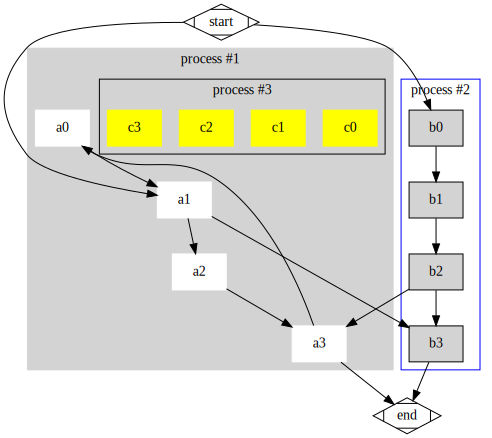

In [89]:
gc.graph